In [1]:
!pip install wordcloud

In [2]:
from wordcloud import WordCloud

In [16]:
# 한글 문장 리스트
sentences = [
    "오늘 날씨가 좋아서 나들이 가고 싶다.",
    "이 영화는 정말 재미있었어요.",
    "맛있는 음식을 먹으러 갈까요?",
    "운동을 하면 건강에 좋아지는 것 같아요.",
    "공부하기 싫어서 미루고 있어요.",
    "여행 계획을 세우고 있는데 어디로 갈까요?",
    "좋은 책을 읽으면 마음이 편안해져요.",
    "오늘은 친구들과 만나서 재미있게 놀았어요.",
    "새로운 언어를 배우는 것은 어려워도 흥미로워요.",
    "주말에 가족들과 함께 시간을 보내기로 했습니다."
]

## 자연어 처리 위한 단어 생성

In [18]:
# split 후 단어로 구성된 list 생성
text_split = text.split()
text_split

['오늘',
 '날씨가',
 '좋아서',
 '나들이',
 '가고',
 '싶다.',
 '이',
 '영화는',
 '정말',
 '재미있었어요.',
 '맛있는',
 '음식을',
 '먹으러',
 '갈까요?',
 '운동을',
 '하면',
 '건강에',
 '좋아지는',
 '것',
 '같아요.',
 '공부하기',
 '싫어서',
 '미루고',
 '있어요.',
 '여행',
 '계획을',
 '세우고',
 '있는데',
 '어디로',
 '갈까요?',
 '좋은',
 '책을',
 '읽으면',
 '마음이',
 '편안해져요.',
 '오늘은',
 '친구들과',
 '만나서',
 '재미있게',
 '놀았어요.',
 '새로운',
 '언어를',
 '배우는',
 '것은',
 '어려워도',
 '흥미로워요.',
 '주말에',
 '가족들과',
 '함께',
 '시간을',
 '보내기로',
 '했습니다.']

## 자연어 처리 위한 형태분석기 적용

In [19]:
from mecab import MeCab
mecab = MeCab()

In [20]:
mecab.nouns(sentences[0]), #mecab.pos(sentences[0])

(['날씨', '나'],)

In [21]:
morphs_list = list()
for sentence in sentences :
    morphs = mecab.nouns(sentence)
    morphs_list = morphs_list + morphs
morphs_list

['날씨',
 '나',
 '영화',
 '음식',
 '운동',
 '건강',
 '것',
 '공부',
 '여행',
 '계획',
 '어디',
 '책',
 '마음',
 '편안',
 '오늘',
 '친구',
 '언어',
 '것',
 '흥미',
 '주말',
 '가족',
 '시간']

In [22]:
from collections import Counter
nouns_count = Counter(morphs_list)

In [23]:
# 영어가 아닌 다른 언어를 입력 시 깨짐 -> 해당 폰트 경로를 넣어줘야 함.
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud = WordCloud(font_path=font_path, background_color='white')
wordCloud.generate_from_frequencies(nouns_count)

In [24]:
wordCloud.words_

{'것': 1.0,
 '날씨': 0.5,
 '나': 0.5,
 '영화': 0.5,
 '음식': 0.5,
 '운동': 0.5,
 '건강': 0.5,
 '공부': 0.5,
 '여행': 0.5,
 '계획': 0.5,
 '어디': 0.5,
 '책': 0.5,
 '마음': 0.5,
 '편안': 0.5,
 '오늘': 0.5,
 '친구': 0.5,
 '언어': 0.5,
 '흥미': 0.5,
 '주말': 0.5,
 '가족': 0.5,
 '시간': 0.5}

In [25]:
# "맛있는 음식을 먹으러 갈까요?" -> 4개
# "여행 계획을 세우고 있는데 어디로 갈까요?" -> 6개
# 단어는 10개이지만 동일한 단어 존재 가능(갈까요?)
# 전체 단어의 개수에 따라서 wordcloud의 단어 크기가 달라진다

# 문장 합치기
text = ' '.join(morphs_list)
text

'날씨 나 영화 음식 운동 건강 것 공부 여행 계획 어디 책 마음 편안 오늘 친구 언어 것 흥미 주말 가족 시간'

In [26]:
import re
pattern = r'[나것]'
text_regex = re.sub(pattern=pattern, repl='', string=text) # params 순서 : 변경대상, 대상 대체, 어떤것을
text_regex

'날씨  영화 음식 운동 건강  공부 여행 계획 어디 책 마음 편안 오늘 친구 언어  흥미 주말 가족 시간'

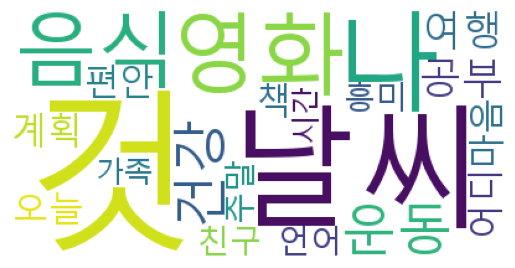

In [27]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off') # plt 옵션 : 축 없애기
plt.show()